<a href="https://colab.research.google.com/github/SylGrafe/RepoDl04/blob/master/lab2SaveW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lab2SaveW , 

---


**See lab2Sygr0003.pdf  for instructions and comments**


Using TensorFlow backend.


Cloning into 'RepoDl04'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 41 (delta 21), reused 32 (delta 12), pack-reused 0
Unpacking objects: 100% (41/41), done.


DEBUG initData() fname RepoDl04/jena_climate_2009_2016.csv
getData () will read  RepoDl04/jena_climate_2009_2016.csv
Found TPU at: grpc://10.48.86.90:8470
DEBUG initData() fname RepoDl04/jena_climate_2009_2016.csv
Found TPU at: grpc://10.48.86.90:8470
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Querying Tensorflow master (grpc://10.48.8

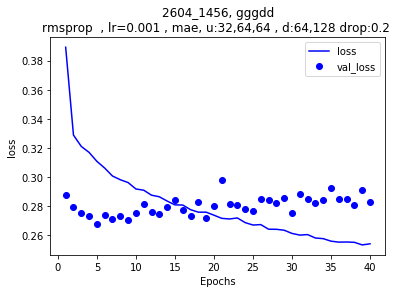

<Figure size 432x288 with 0 Axes>

In [0]:
#!/usr/bin/env python
# coding: utf-8
# run fit  , save weights , save model info  nad history in json file

import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras import models
import tensorflow as tf
"""
from keras import layerslab

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input
from tensorflow.keras import backend as K
from keras.optimizers import RMSprop
from tensorflow.python.keras.layers import Input, LSTM, GRU , Bidirectional, Dense, Embedding
"""


get_ipython().system('git clone https://github.com/SylGrafe/RepoDl04.git')
sys.path.insert(0, "RepoDl04")
import lab2U00
import lab2MakeModels
import lab2JsonUtils




#  init data generator and retrieve TPU address
TpuAddress = lab2U00.initData (doRunLocal=False)


startTime= datetime.datetime.now()
timeStample= startTime.strftime("%d%m_%H%M") 
myLr=0.001
optimizerStr = 'rmsprop  , lr=%s ' % myLr
lossStr = 'mae'
theDumpFileName = "%s.json" % timeStample
compInfoStr= optimizerStr + ", " + lossStr
myEpochs=40

codeRef="lab2SaveW"
infoStr="no more info"
modelStruct="no Struct yet"
theWeightsFilename="no name yet"
inputBatchSize=128
# for some values of  myNbOfBatchsPerEpoch 
# there is a long time between each epoch 
# defautl value is 500
# myNbOfBatchsPerEpoch=500


# CandR is mandatory  to  save the data
CAndR = lab2JsonUtils.ConfigAndResults

######################################################################
############### main 
######################################################################


inputBS=128
myUnits1 = 32 
myUnits2 = 64
myD1=64
myD2 =128
# for some values of  myNbOfBatchsPerEpoch 
# there is a long time between each epoch
myNbOfBatchsPerEpoch=500
myLr=0.001

#  init data generators 
TpuAddress = lab2U00.initData (doRunLocal=False)

tSLen1 =  lab2U00.getTSLen()
nbOfFeat1 = lab2U00.getFeatNb()








# create a model
modelStruct="gggdd"
if modelStruct == "dense":    
    model=lab2MakeModels.makeDenseModel (tSLen1 , nbOfFeat1, batch_size = inputBS, lrPar=myLr )
elif modelStruct == "gru1":    
    model=lab2MakeModels.makeGRU1Model (tSLen1 , nbOfFeat1, batch_size = inputBS,  lrPar=myLr)
elif modelStruct == "gru2":    
    model=lab2MakeModels.makeGRU2Model (tSLen1 , nbOfFeat1, batch_size = inputBS,  lrPar=myLr)
elif modelStruct == "grugru":    
    model=lab2MakeModels.makeGRUGRUModel (tSLen1 , nbOfFeat1, batch_size = inputBS,  
        lrPar=myLr , u1=myUnits1 , u2=myUnits2  , d1=myD1)
    infoStr="u1:%d, u2:%d , d1:%d" % (myUnits1 , myUnits2 , myD1)
elif modelStruct == "ggdd":    
    model=lab2MakeModels.makeGGDDModel (tSLen1 , nbOfFeat1, batch_size = inputBS,  
        lrPar=myLr , u1=myUnits1 , u2=myUnits2  , d2=myD2 ,  d1=myD1)
    infoStr="u:%d:%d , d:%d,%d" %    (myUnits1 , myUnits2 , myD1 , myD2)    
elif modelStruct == "lldd":    
    model=lab2MakeModels.makeLLDDModel (tSLen1 , nbOfFeat1, batch_size = inputBS,  
        lrPar=myLr , u1=myUnits1 , u2=myUnits2  , d2=myD2 ,  d1=myD1)
    infoStr="u1:%d:%d , d:%d,%d" %    (myUnits1 , myUnits2 , myD1 , myD2)    

elif modelStruct == "lstmlstm":    
    model=lab2MakeModels.makeLSTMLSTMModel (tSLen1 , nbOfFeat1, batch_size = inputBS,  
        lrPar=myLr , u1=myUnits1 , u2=myUnits2)
    infoStr="u:%d,%d " % (myUnits1 , myUnits2  )
elif modelStruct == "gggdd":  
    myU3=64
    myDrop=0.2
    model=lab2MakeModels.makeGGGDDModel (tSLen1 , nbOfFeat1, batch_size = inputBS,  
        lrPar=myLr , u1=myUnits1 , u2=myUnits2 ,u3=myU3 , d2=myD2 ,  d1=myD1)
    infoStr="u:%d,%d,%d , d:%d,%d drop:%.1f " %      (
        myUnits1 , myUnits2, myU3,  myD1 , myD2 , myDrop)    

else:  
  print (" \n***** EXIT  , %s invalid modeStruct" % (modelStruct))  
  sys.exit(1)




# use the sametimeStample to identify the file with the weights
theWeightsFilename =  "%s_%s.h5" % ( modelStruct , timeStample  )
  
  
# if TPU the model must be convert with  keras_to_tpu_model
if (TpuAddress): 
  #infoStr=" TPU , inputBatchSize %s"  % inputBatchSize

  codeRef += " onTPU"
  theModel = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TpuAddress)))

else:
  # No tpu found
  print ("run on GPU or CPU ")

  theModel = model


# fit and evaluate
print ("%s fit_generator  , info:%s"  %( modelStruct , infoStr ) )

theFit = theModel.fit_generator( 
    lab2U00.getTrainGen(), steps_per_epoch = myNbOfBatchsPerEpoch,
  validation_data=lab2U00.getValGen(),
  validation_steps=lab2U00.getValSteps(),
  epochs=myEpochs,
  verbose=1)



print (theWeightsFilename)


theModel.save_weights(theWeightsFilename)



print ("theModel.evaluate_generator(lab2U00.getTestGen() , steps=50) ")
testRes= theModel.evaluate_generator(lab2U00.getTestGen() , steps=50)



# save relevant information 

res= CAndR (modelStruct ,compInfoStr , theFit.history ,  theFit.params , 
  timeStample  , testRes= testRes ,
            codeRef=codeRef , info=infoStr , h5=theWeightsFilename)


# dump the relevant info in the json  file
lab2JsonUtils.dumpOnFile (res , theDumpFileName)


print (res.toString())
lab2JsonUtils.plotHist (res )







In [0]:

# donload  the files on local host
# this code crashes if  it is executed  in the previous cell
from google.colab import files
files.download(theDumpFileName)
files.download(theWeightsFilename)



In [1]:
!ls RepoDl04/


ls: cannot access 'RepoDl04/': No such file or directory


endnotebook